In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6cc69f941d3441e1bb320455292529eb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='P8Lz-wBlpj3KWv3s2KDVUkghjpZZUjUXdB8YQa5-SUTI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6cc69f941d3441e1bb320455292529eb.get_object(Bucket='covid19dataanalysisofitaly-donotdelete-pr-ygprpp6dtzct16',Key='covid19_italy_region.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_data_1.columns

Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [8]:
df_data_1.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
4237,4237,2020-09-12T17:00:00,ITA,19,Sicilia,38.115697,13.362357,116,18,134,1613,1747,44,3144,289,5180,298359.0
4238,4238,2020-09-12T17:00:00,ITA,9,Toscana,43.769231,11.255889,74,18,92,2310,2402,138,9473,1148,13023,419422.0
4239,4239,2020-09-12T17:00:00,ITA,10,Umbria,43.106758,12.388247,18,4,22,397,419,33,1542,81,2042,106482.0
4240,4240,2020-09-12T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,3,0,3,31,34,1,1078,146,1258,18424.0
4241,4241,2020-09-12T17:00:00,ITA,5,Veneto,45.434905,12.338452,99,12,111,2829,2940,138,19586,2141,24667,668332.0


### Describe  is used to check fill null values with the help off mean,median mode. Since it is short data we don't make any change 

In [9]:
df_data_1.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,4242.00000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,3.087000e+03
mean,2120.50000,11.857143,43.046293,12.225955,399.320368,44.786657,444.107025,1514.022867,1958.129892,67.504479,5967.488213,1265.888496,9191.506601,1.552927e+05
std,1224.70425,6.274538,2.489074,2.659261,1248.978546,132.633550,1376.869330,3391.694678,4527.028354,189.132973,12274.474700,3075.511105,17840.793653,1.685709e+05
min,0.00000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.000000,3.482000e+03
25%,1060.25000,7.000000,41.125596,11.121231,9.000000,0.000000,10.000000,80.000000,97.000000,2.000000,363.000000,76.000000,1162.000000,4.818100e+04
50%,2120.50000,12.000000,43.616760,12.388247,50.000000,5.000000,56.000000,352.000000,417.000000,11.000000,1660.000000,292.000000,3281.000000,9.306000e+04
75%,3180.75000,17.000000,45.434905,13.768136,215.000000,26.000000,242.750000,1348.750000,1660.500000,53.000000,4648.250000,965.500000,8102.750000,2.043725e+05
max,4241.00000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,3251.000000,77611.000000,16896.000000,103074.000000,1.120531e+06


### Checking whether null values are present or not

In [10]:
df_data_1.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

#### Relating the variable with scatterplots

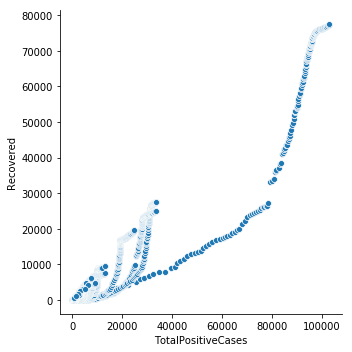

In [13]:
sns.relplot(x="TotalPositiveCases", y="Recovered",data=df_data_1)

##### Initially the relationship between the no of positive case and recovered  case were not linear and also as the case reached 80000 recovery rate stopped but later on recovery rate has increase.   

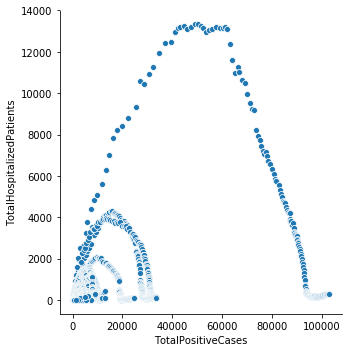

In [4]:
sns.relplot(x="TotalPositiveCases", y="TotalHospitalizedPatients",data=df_data_1)

##### As we can see that curve is getting flattened, it reached the peak once and now it has decreased.

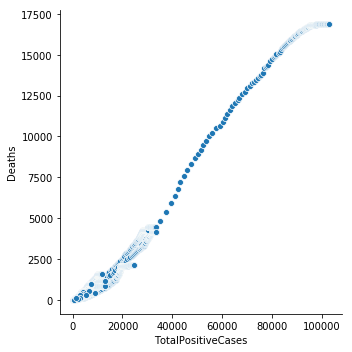

In [14]:
sns.relplot(x="TotalPositiveCases", y="Deaths",data=df_data_1)

##### Initially the death took place on large scale as lockdown was not imposed but later it took a linear growth  as no of positive cases increased and now we can see that there is hint of surge in death rate after it has reach its peak

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


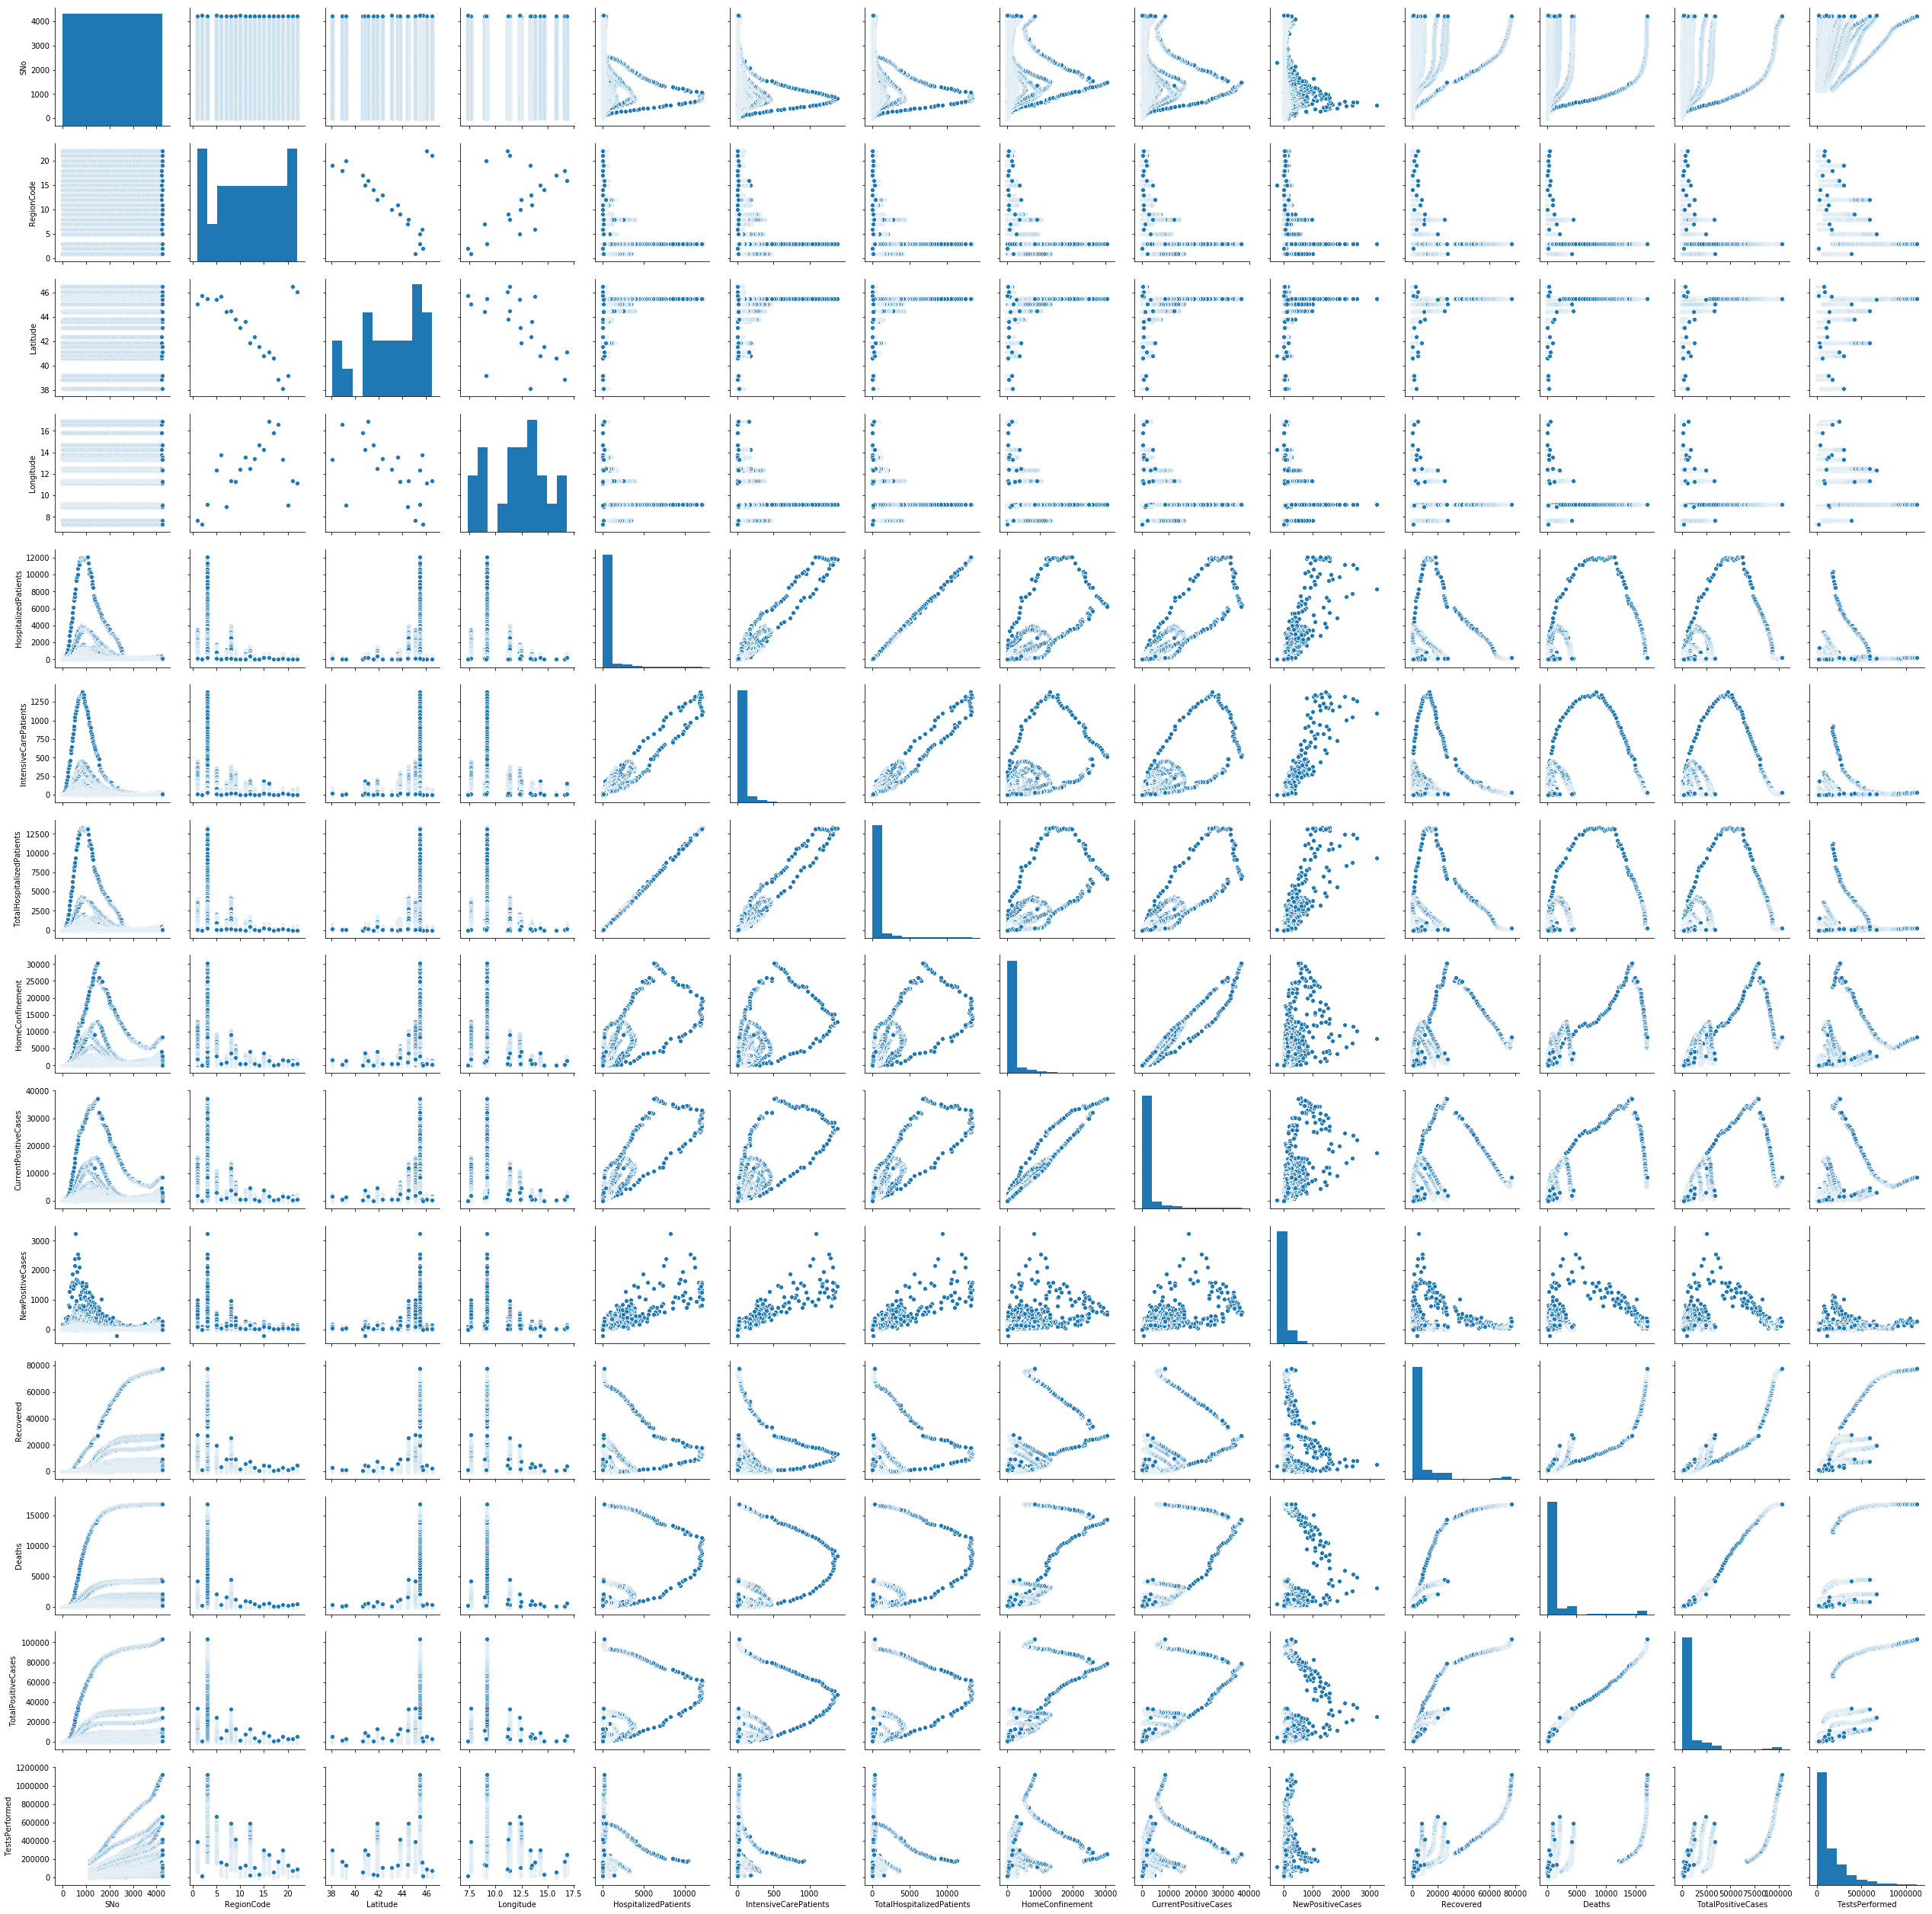

In [18]:
sns.pairplot(df_data_1)

##### Pairplot gives the relationship between each variable

### Visual Representation gives a better insights that as the no of postive cases increase, no of hospitailzed patients are also increasing, and also growth is linear among each other realtion which we can verify through pairplot graph.

## Conclusion 
#### 1. People are increasing in total no of recoverd cases
#### 2.We need to work on flattening the curved , from  the example of italy. 